# 2023 Data Analysis

In [1]:
import seaborn as sns
sns.set()
sns.set_palette("Dark2")

# automatically reload utils module when it changes
%load_ext autoreload
%autoreload 2

# import utility functions
import sys
sys.path.append('../')
from src.utils import *

# set plotting defaults
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

# requires version 0.12.0 or higher
sns.__version__

In [4]:
# load the 2023 data
df = get_data(2023)

Breakdown by Outlier Condition:
	Outlier Rents: 5461 (30%)
	Outlier Increase vs Base: 608 ( 3%)
	Outlier Increase vs Previous: 328 ( 2%)
	Overall: 5905 (33%)

Breakdown by Subset:
	5905 outliers (33%)
	12081 non-outliers (67%)


	8567 rent increase (48%)
	9419 no rent increase (52%)


	7146 exempt (40%)
	10840 not exempt (60%)


# Population Statistics

Text(0, 0.5, 'Number of Units')

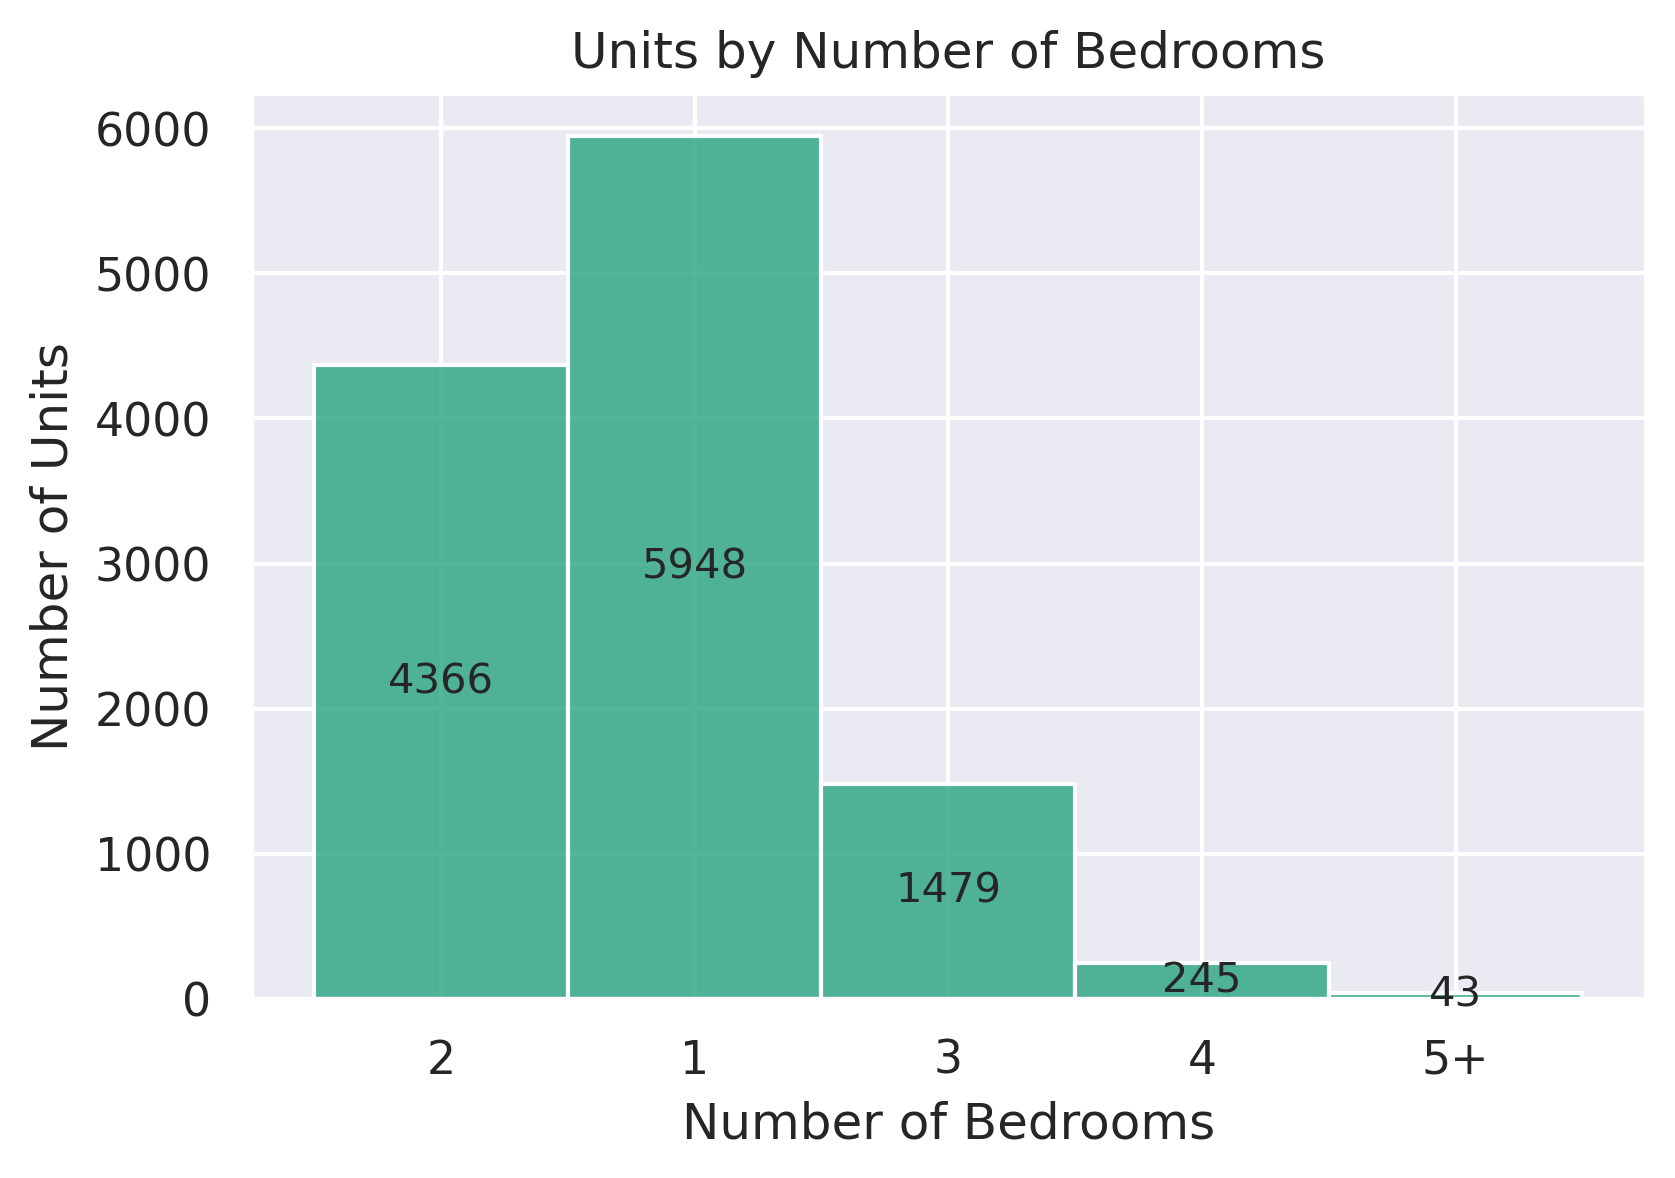

In [44]:
ax = sns.histplot(
    data=df[~df["outlier"]],
    x='nbrBedRms_grouped'
    )
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt='%d',
        label_type='center'
        )
ax.set_title("Units by Number of Bedrooms")
ax.set_xlabel("Number of Bedrooms")
ax.set_ylabel("Number of Units")

# Overall Rent Statistics (Outliers Removed)

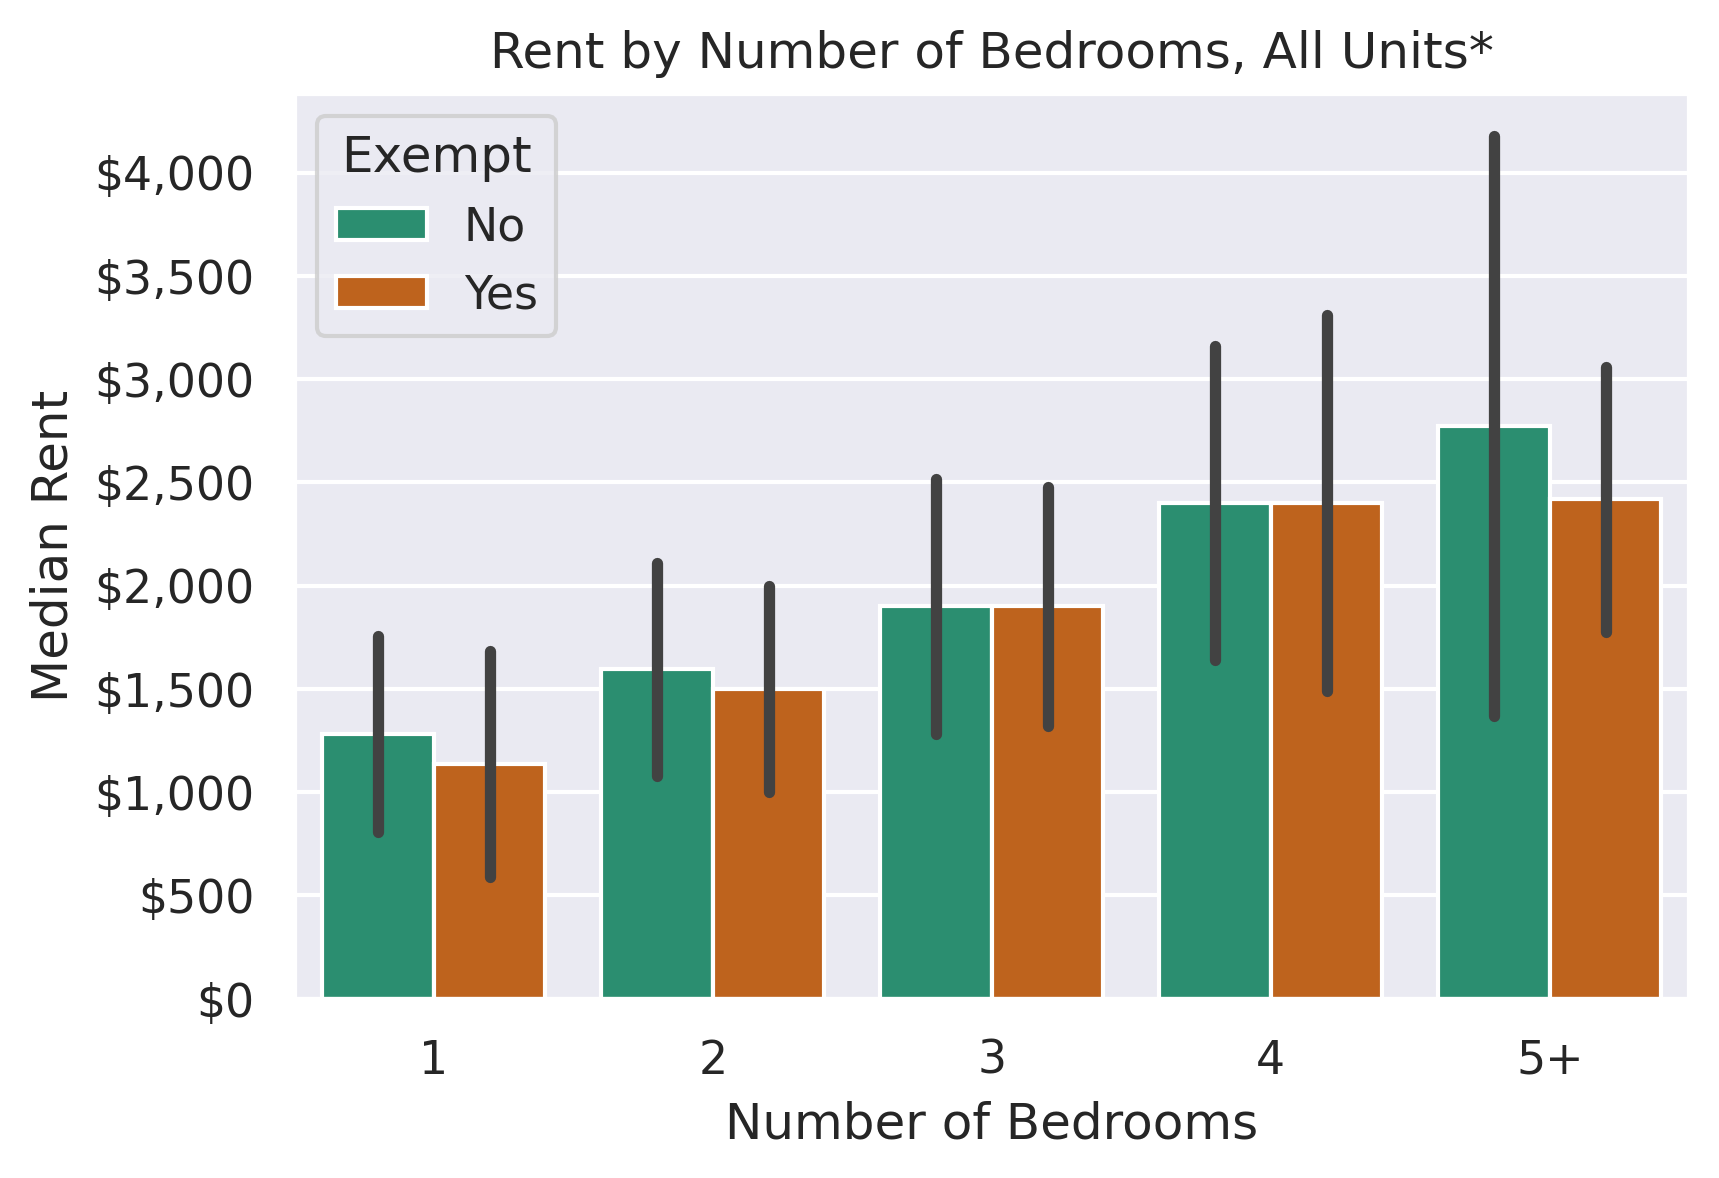

In [28]:
ax = sns.barplot(
    data=df[~df["outlier"]].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt",
    estimator=np.median,
    errorbar='sd'
    )
ax.set_title("Rent by Number of Bedrooms, All Units*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '${:,}'.format(int(x))))
ax.set_ylabel("Median Rent")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title="Exempt", handles=handles, labels=["No", "Yes"])

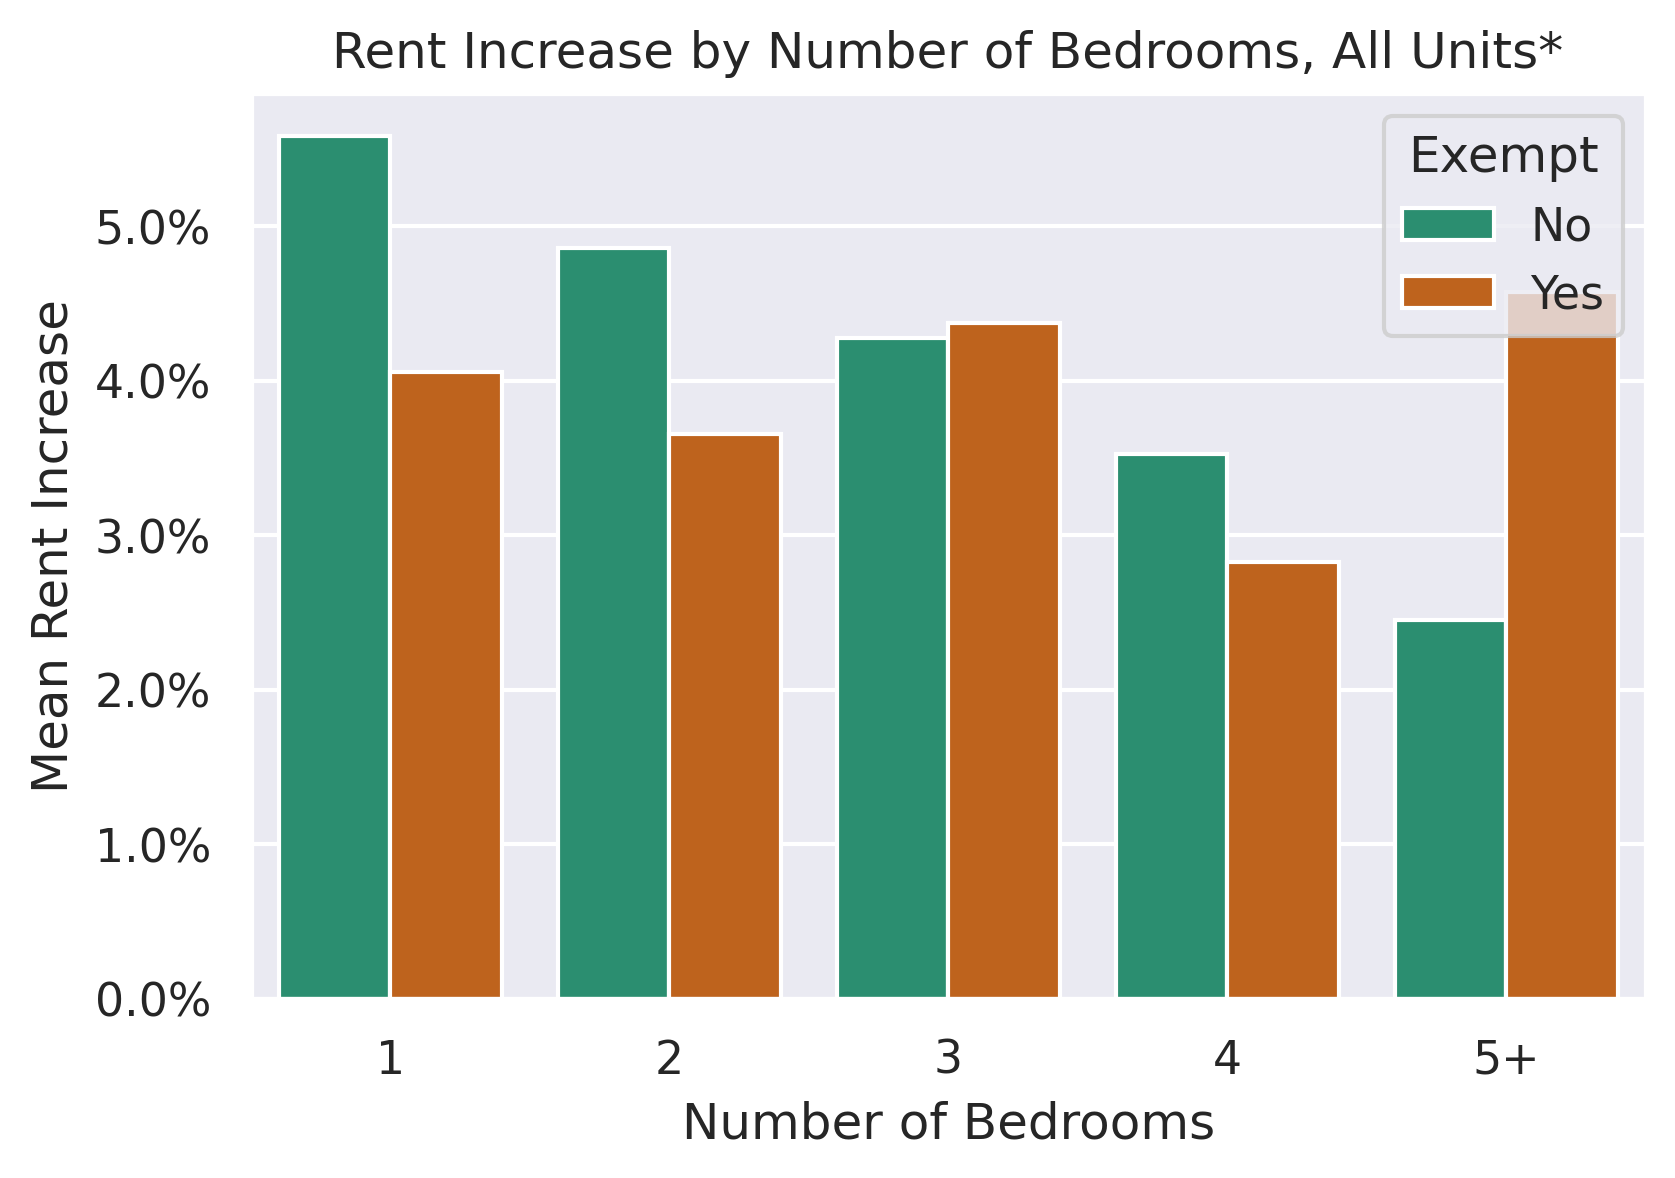

In [36]:
ax = sns.barplot(
    data=df[~df["outlier"]].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt",
    estimator=np.mean,
    errorbar=None
    )
ax.set_title("Rent Increase by Number of Bedrooms, All Units*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '{:.1f}%'.format(int(x))))
ax.set_ylabel("Mean Rent Increase")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title="Exempt", handles=handles, labels=["No", "Yes"])

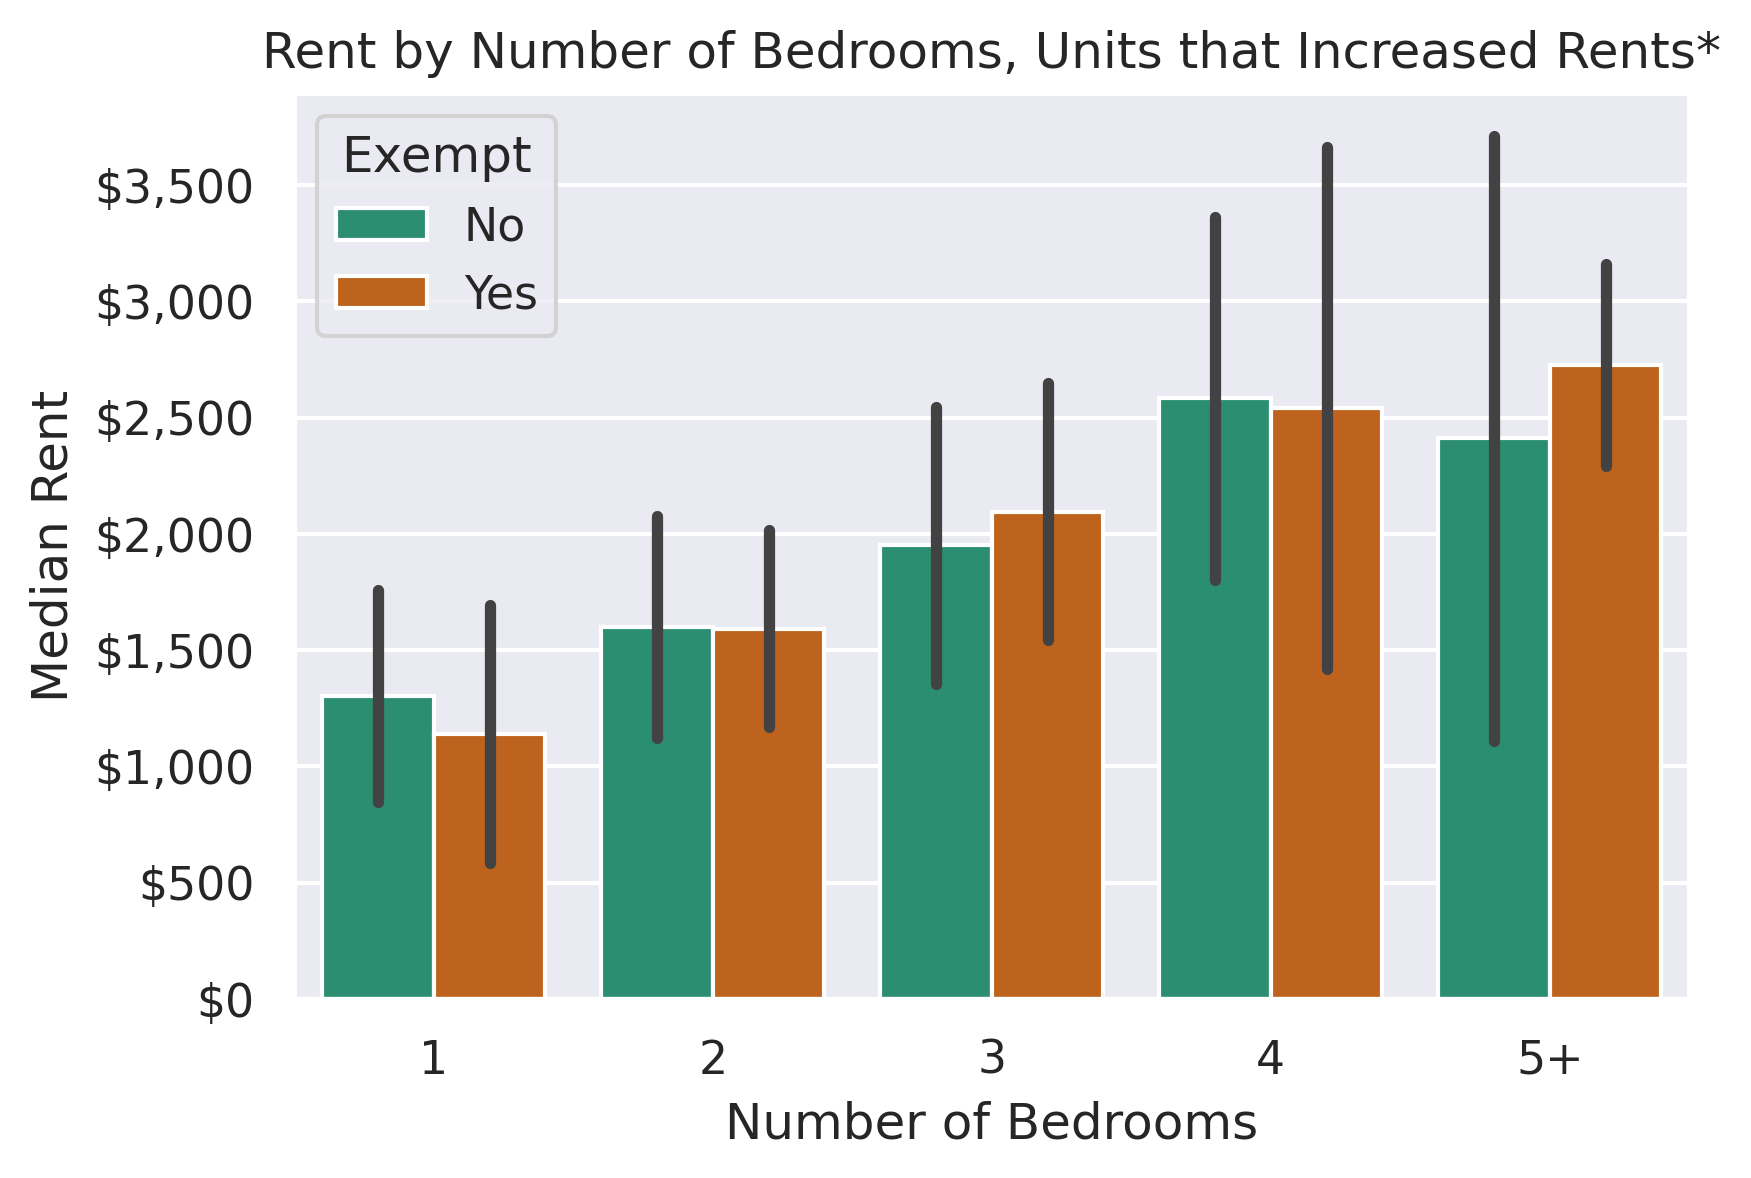

In [27]:
ax = sns.barplot(
    data=df[~df["outlier"] & (df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt",
    estimator=np.median,
    errorbar='sd'
    )
ax.set_title("Rent by Number of Bedrooms, Units that Increased Rents*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '${:,}'.format(int(x))))
ax.set_ylabel("Median Rent")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title="Exempt", handles=handles, labels=["No", "Yes"])

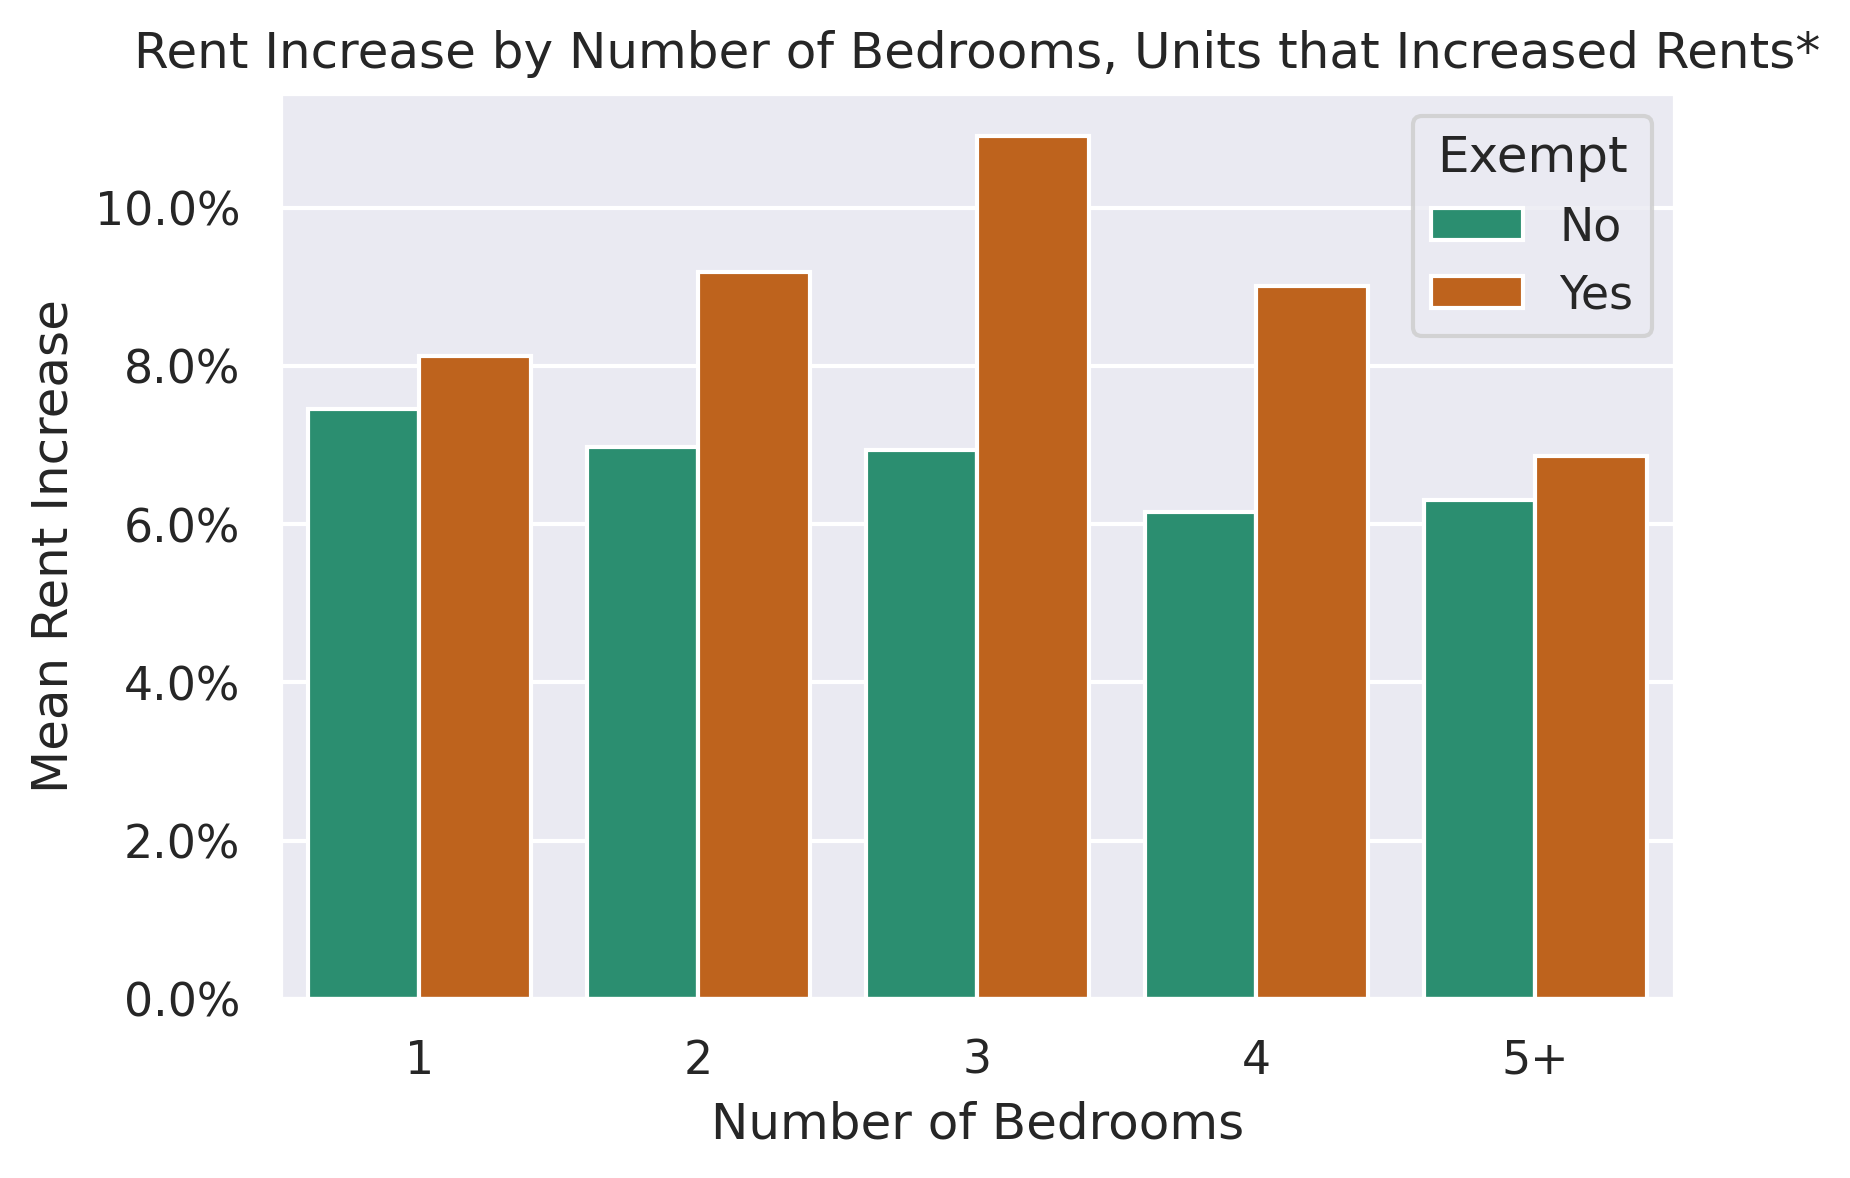

In [34]:
ax = sns.barplot(
    data=df[~df["outlier"] & (df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt",
    estimator=np.mean,
    errorbar=None
    )
ax.set_title("Rent Increase by Number of Bedrooms, Units that Increased Rents*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '{:.1f}%'.format(int(x))))
ax.set_ylabel("Mean Rent Increase")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title="Exempt", handles=handles, labels=["No", "Yes"])

# Overall Rent Statistics (Outliers Included)
These charts are included for completeness only and should not be used in subsequent analysis.

In [ ]:
ax = sns.barplot(
    data=df.sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt"
    )
ax.set_title("Rents by Number of Bedrooms, All Registered Units")

In [ ]:
ax = sns.barplot(
    data=df.sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt"
    )
ax.set_title("Rent Increase Percentages by Number of Bedrooms, All Registered Units")

In [ ]:
ax = sns.barplot(
    data=df[df["Rent_Inc"] > 0].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt"
    )
ax.set_title("Rents by Number of Bedrooms, Only Units that Increased Rents")

In [ ]:
ax = sns.barplot(
    data=df[(df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt"
    )
ax.set_title("Rents Increase Percentages by Number of Bedrooms, Only Units that Increased Rents")